# Course 4: 線性回歸

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1. Read Data
- ref: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv
- GrLivArea: Above grade (ground) living area square feet
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict

In [84]:
data = pd.read_csv('data/house_prices_train.csv', usecols=['SalePrice', 'GrLivArea'], nrows=100)
data.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


## 2. Data Exploration

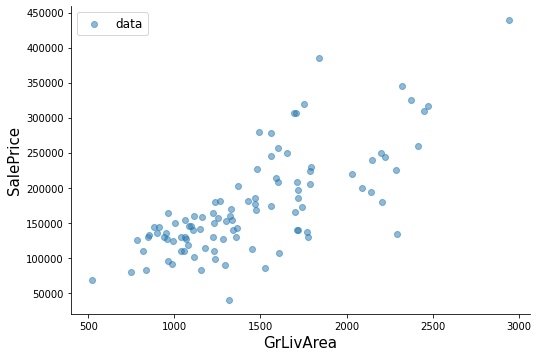

In [99]:
sns.lmplot(x='GrLivArea', y='SalePrice', data=data, aspect=1.5, fit_reg=False, ci=None, scatter_kws={'alpha':0.5})
plt.xlabel('GrLivArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.legend(fontsize=12, labels=['data', 'LR'])
plt.show()

## 3. Build Linear Regression Model 

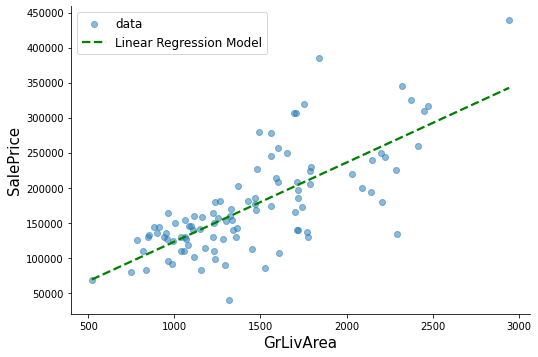

In [88]:
sns.lmplot(x='GrLivArea', y='SalePrice', data=data, aspect=1.5, fit_reg=True, ci=None, line_kws={'color':'green', 'linestyle':'--'}, scatter_kws={'alpha':0.5, })
plt.xlabel('GrLivArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.legend(fontsize=12, labels=['data', 'Linear Regression Model'])
plt.show()


In [181]:
model = LinearRegression()
model.fit(data[['GrLivArea']].values, data['SalePrice'])
print(f'coef.: {model.coef_}')
print(f'intercept: {model.intercept_}')

coef.: [112.82772962]
intercept: 10280.250744848716


In [112]:
gr_liv_area = 2500
sales_price = model.predict([[gr_liv_area, ]])
print(f'gr_liv_area: {gr_liv_area}, sales_price:{sales_price}')


gr_liv_area: 2500, sales_price:[292349.57479976]


## 4. R-Squared error

/Users/jayhsu/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


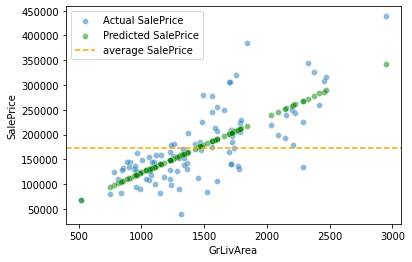

In [183]:

data['SalePrice_pred'] = model.predict(data[['GrLivArea']])
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, alpha=0.5, label='Actual SalePrice')
sns.scatterplot(x='GrLivArea', y='SalePrice_pred', data=data, alpha=0.5, label='Predicted SalePrice', color='green')
plt.axhline(data['SalePrice'].mean(), color='orange', linestyle='--', label='average SalePrice')
plt.legend()

In [146]:
from sklearn.metrics import r2_score

In [147]:
data['SalePrice_pred'] = model.predict(data[['GrLivArea']].values)
r2 = r2_score(data['SalePrice'], data['SalePrice_pred'])
print(f'R^2 score: {r2}')

R^2 score: 0.5404143956208352


## 5. 加入更多feature

In [164]:
data = pd.read_csv('data/house_prices_train.csv', usecols=['SalePrice', 'GrLivArea','BedroomAbvGr'], nrows=100)
data.head()

,GrLivArea,BedroomAbvGr,SalePrice
0,1710,3,208500
1,1262,3,181500
2,1786,3,223500
3,1717,3,140000
4,2198,4,250000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


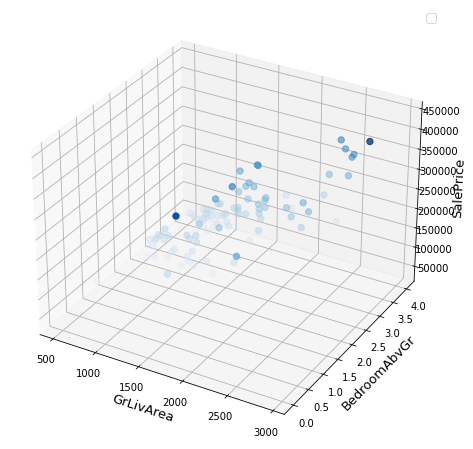

In [176]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(projection='3d')
ax.scatter(data['GrLivArea'], data['BedroomAbvGr'], data['SalePrice'], s=40, c=data['SalePrice'],cmap='Blues')
ax.set_xlabel('GrLivArea', fontsize=13)
ax.set_ylabel('BedroomAbvGr', fontsize=13)
ax.set_zlabel('SalePrice', fontsize=13)
ax.legend(fontsize=12)
plt.show()

In [203]:
model = LinearRegression()
model.fit(data[['GrLivArea', 'BedroomAbvGr']].values, data['SalePrice'])
print(f'coef.: {model.coef_}')
print(f'intercept: {model.intercept_}')

coef.: [   121.90253488 -12827.4497952 ]
intercept: 31888.981712072593


/Users/jayhsu/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


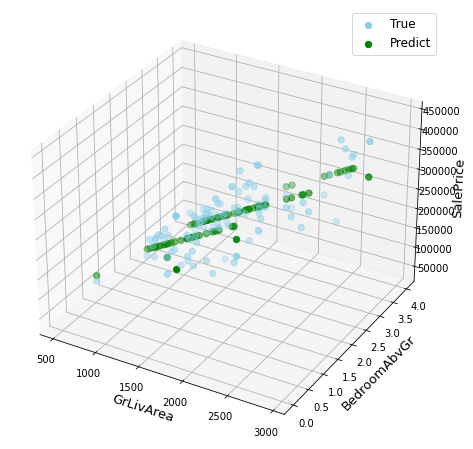

In [202]:

data['SalePrice_pred'] = model.predict(data[['GrLivArea', 'BedroomAbvGr']])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(projection='3d')
ax.scatter(data['GrLivArea'], data['BedroomAbvGr'], data['SalePrice'], s=40, color='skyblue', label='True')
ax.scatter(data['GrLivArea'], data['BedroomAbvGr'], data['SalePrice_pred'], s=40, color='green', label='Predict')
ax.set_xlabel('GrLivArea', fontsize=13)
ax.set_ylabel('BedroomAbvGr', fontsize=13)
ax.set_zlabel('SalePrice', fontsize=13)
ax.legend(fontsize=12)
plt.show()